<a href="https://colab.research.google.com/github/jangvu/Project_by_me/blob/main/time_series_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
raw_data = np.load('/content/drive/MyDrive/Data/candidate_test/data_train_candidate.npy')
test_data = np.load('/content/drive/MyDrive/Data/candidate_test/data_test_candidate.npy')

In [5]:
X_full, y_full = raw_data[:,:3], raw_data[:,3:]
X_test_full, y_test_full = test_data[:,:3], test_data[:,3:]

**Creating window size = 10, shift = 1**

In [ ]:
'''def getdata(data,windowsize,shift):
  X_data = []
  y_data = []
  for i in range(len(data) - windowsize - shift):
    X_data.append(data[i:i+ windowsize, :])
    y_data.append(data[i+windowsize:i+windowsize+shift])
  return X_data, y_data

In [6]:
X_data = []
y_data = []
data = X_full
X_test = []
y_test = []
windowsize = 10
shift = 1
for i in range(len(data) - windowsize - shift):
  X_data.append(X_full[i:i+ windowsize, :])
  y_data.append(y_full[i+windowsize: i+windowsize+shift, :])
  X_test.append(X_test_full[i:i+ windowsize, :])
  y_test.append(y_test_full[i+windowsize: i+windowsize+shift, :])


In [7]:
X_data = np.asarray(X_data)
y_data = np.asarray(y_data)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

X_data.shape

(989, 10, 3)

**Reshape input into format of LSTM**

In [ ]:
print(X_data.shape)
print(y_data.shape)
#X_data = X_data.reshape(-1,10,3)
#y_data = y_data.reshape(-1)


(989, 10, 3)
(989, 1, 1)


**Creating RRN model**

In [45]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)

In [46]:
n_input = 10
n_features = 3

model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=10, input_shape=(n_input, n_features), return_sequences=True))
#model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))

#model.add(keras.layers.LSTM(units=20, return_sequences=True))
#model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.LSTM(units=10))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1))
model.compile(optimizer=optimizer, loss='mse')

In [47]:
model.fit(X_data,y_data,epochs=200, batch_size=32)

Epoch 1/200
31/31 [==============================] - 3s 8ms/step - loss: 4.1844e-04
Epoch 2/200
31/31 [==============================] - 0s 8ms/step - loss: 3.7080e-06
Epoch 3/200
31/31 [==============================] - 0s 8ms/step - loss: 5.7798e-07
Epoch 4/200
31/31 [==============================] - 0s 8ms/step - loss: 2.7435e-07
Epoch 5/200
31/31 [==============================] - 0s 8ms/step - loss: 2.0656e-07
Epoch 6/200
31/31 [==============================] - 0s 8ms/step - loss: 1.5912e-07
Epoch 7/200
31/31 [==============================] - 0s 8ms/step - loss: 1.8365e-07
Epoch 8/200
31/31 [==============================] - 0s 8ms/step - loss: 1.4424e-07
Epoch 9/200
31/31 [==============================] - 0s 8ms/step - loss: 1.3625e-07
Epoch 10/200
31/31 [==============================] - 0s 8ms/step - loss: 1.3576e-07
Epoch 11/200
31/31 [==============================] - 0s 8ms/step - loss: 1.3804e-07
Epoch 12/200
31/31 [==============================] - 0s 8ms/step - loss: 

In [48]:
X_test = X_test.reshape(-1,10,3)
X_test.shape

(989, 10, 3)

In [55]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1)
y_test = y_test.reshape(-1)

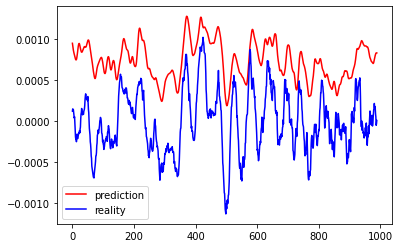

In [57]:
plt.plot(y_pred, color = 'red', label = 'prediction')
plt.plot(y_test, color = 'blue', label ='reality')
plt.legend()
plt.show()